# Stock Price Prediction with Gaussian Process Regression

In this notebook, we will discuss how to predict stock prices using Gaussian Process Regression (GPR), a supervised machine learning algorithm.

Specifically, we will use minute-level exchange data for opening prices and traded volume to predict high minute-level prices for the Apple Stock.

### Import Block

In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf 
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel 
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns', 10) 

### Data Download

In [2]:
# Download apple ticker
apple = yf.Ticker("aapl") 
DF = apple.history(start="2021-1-1", end="2021-1-6", interval="1m")

# Get features and labels
y = DF["High"].values 
feature_keys = ["Volume", "Open"]
x = DF[feature_keys].values.reshape((-1, len(feature_keys))) 

### Dataset Split into Training and Testing

In [3]:
# Transform the data
scaler_x = StandardScaler()
x_norm = scaler_x.fit_transform(x)

# Set up training and testing data
n_split = int(y.shape[0] * 0.8) 
x_train, y_train = x_norm[:n_split], y[:n_split] 
x_test, y_test = x_norm[n_split:], y[n_split:]

### Set Up and Fit Gaussian Process Regressor

In [4]:
# Set up Gaussian Process Regressor
kernel = DotProduct() + WhiteKernel()

gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(x_train, y_train) 
score = gpr.score(x_train, y_train) # Score GPR 
print(score) ## R^2 
y_bar_hat, y_std = gpr.predict(x_test, return_std=True) 
reward_data = {"t": np.arange(y_test.shape[0]), "y": y_bar_hat} 

0.9575218218816983


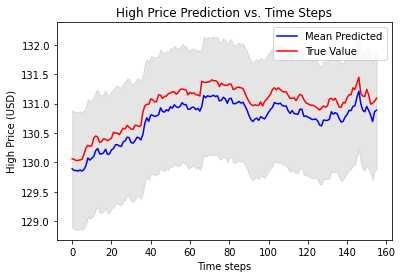

In [6]:
# Specify the intervals
interval_plus = np.add(y_bar_hat, y_std)
interval_minus = np.subtract(y_bar_hat, y_std)

# Create the plot with CI
plt.plot(y_bar_hat, color="b", label="Mean Predicted")
plt.plot(y_test, color="r", label="True Value")
plt.fill_between(reward_data["t"], interval_plus, interval_minus, color='gray', alpha=0.2)
plt.legend()
plt.xlabel("Time steps")
plt.ylabel("High Price (USD)")
plt.title("High Price Prediction vs. Time Steps")
plt.show()